In [8]:
# imports and env't config 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import json
import requests 
from imp import reload 
import Util; reload(Util)
from pygeocoder import Geocoder as gc
import warnings
from pygeolib import GeocoderError
import time 
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
# read probes metadata 
probe_data = pd.read_csv("../../dataset/2017-tnsm/probes_metadata.csv", sep = ',', encoding = "ISO-8859-1")

In [10]:
probes_group_by_loc = probe_data.groupby(['unit_id', 'long', 'lat']).size().reset_index()

In [11]:
probes_group_by_loc.head()

,unit_id,long,lat,0
0,19602,-3.6740,40.4069,231
1,62712,8.8000,53.0833,145
2,62712,10.7389,59.9132,181
3,123256,10.7028,53.8511,150
4,123256,11.5732,48.1299,107


In [12]:
za_probes = probe_data[probe_data['unit_id'] == 635774]
set(za_probes['long'])

{18.4232, 26.1662, 28.0498, 28.0833, 28.3113}

In [13]:
set(za_probes['lat'])

{-33.9258, -29.123, -26.2052, -26.2, -26.1909}

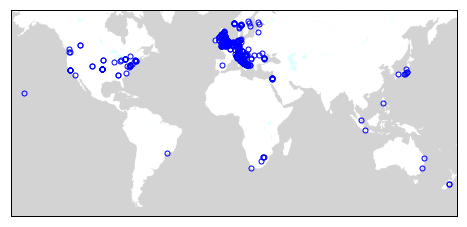

In [20]:
fig = plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 22

llcrnrlat     =    -59.00015  
llcrnrlon     =    -168.04945
urcrnrlat     =    +65.11639              
urcrnrlon     =    +178.67711

m = Basemap (  projection    =    'merc'
             
             , llcrnrlat     =    llcrnrlat
             , llcrnrlon     =    llcrnrlon
             
             , urcrnrlat     =    urcrnrlat         
             , urcrnrlon     =    urcrnrlon
             
             , lat_ts        =    20
             , resolution    =    'c'
            )
#m.drawcoastlines()
m.fillcontinents(color='white',lake_color='lightcyan')

m.drawmapboundary(fill_color='lightgray')
# m.drawcountries()

x,y = m(probes_group_by_loc['long'].values, probes_group_by_loc['lat'].values)
m.plot(x, y, 'b', linestyle = 'none',  marker = '.', markersize=10, fillstyle='none')

plt.savefig('../gfx/probes_geo_distribution.pdf', format='pdf', bbox_inches='tight')

In [15]:
RIPE = ['Belgium', 'France', 'Italy', 'Spain', 'Germany', 'Romania', 'Latvia', \
        'Netherlands' , 'Switzerland', 'Czechia', 'Finland', 'Norway', 'Sweden', \
        'United Kingdom', 'Ireland', 'Slovenia', 'Israel']
ARIN = ['United States', 'Canada']
OTHERS = ['South Africa', 'Philippines', 'Singapore', 'New Zealand', 'Japan',  \
          'Brazil', 'Bosnia and Herzegovina', 'Australia']

ripe = 0
arin = 0
other = 0

for p in set(probe_data['unit_id']):
    if probe_data[probe_data.unit_id == p]['country'].values[0] in RIPE:
#         print("%s found in RIPE" %p)
        ripe +=1
    elif probe_data[probe_data.unit_id == p]['country'].values[0] in ARIN:
#         print("%s found in ARIN" %p)
        arin +=1
    elif probe_data[probe_data.unit_id == p]['country'].values[0] in OTHERS:
#         print("%s found in OTHERS" %p)
        other +=1

ripe, arin, other


(84, 29, 11)

In [17]:
probe_data.head()

,Unnamed: 0,unit_id,dtime,ip,long,lat,country,asn,asn_holder
0,0,635410,2016-08-01,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
1,1,635410,2016-08-02,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
2,2,635410,2016-08-03,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
3,3,635410,2016-08-04,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
4,4,635410,2016-08-05,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited


In [18]:
sk_nordic = [239416, 525918, 632386, 62712, 632438, 660130, 660162, 660166, 901936, 940010, 950216]

In [13]:
# probes in Nordic 
for skid in sk_nordic:
    skid_df = probes_group_by_loc[probes_group_by_loc['unit_id'] == skid]
    long = skid_df['long'].values[0]
    lat = skid_df['lat'].values[0]
    print("{},{},{},{}".format('sk', skid, lat, long))

sk,239416,59.3667,18.0167
sk,525918,60.6667,17.1667
sk,632386,61.35,16.3667
sk,62712,53.0833,8.8
sk,632438,59.9167,10.75
sk,660130,60.5172,5.2461
sk,660162,59.9167,10.75
sk,660166,59.1405,9.6561
sk,901936,59.95,10.75
sk,940010,58.8,9.3833
sk,950216,59.95,10.75
